In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import re 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [2]:
import nltk

In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('flipkart_data.csv')

In [5]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [6]:
df['rating'].unique()

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

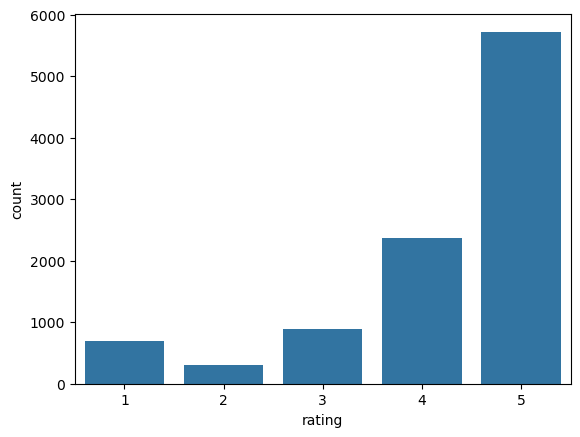

In [7]:
sns.countplot(data = df,
             x = 'rating',
             )


In [8]:
#df.loc(df['rating']>= 5, 'rating')1
#df.loc(df['rating']< 5, 'rating')0

In [9]:
pos_neg = []
for i in range(len(df['rating'])):
    if df['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

df['label'] = pos_neg

In [10]:
df.head()

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [11]:
##creating function to preprocess the dataset

nltk.download('punkt')
from tqdm import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'^\w\s', '', sentence)

        preprocessed_text.append(' '.join(token.lower()for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords.words('english')))


    return preprocessed_text

In [13]:
preprocessed_review = preprocess_text(df['review'].values)
df['review'] = preprocessed_review

100%|█████████████████████████████████████████████████████████████████████████████| 9976/9976 [00:34<00:00, 287.96it/s]


In [14]:
df.head(3)

,review,rating,label
0,nice produt . like 's design lot . 's easy car...,5,1
1,awesome sound .... pretty see nd sound quality...,5,1
2,awesome sound quality . pros 7-8 hrs battery l...,4,0


In [30]:
df['label'].value_counts()

label
1    5726
0    4250
Name: count, dtype: int64

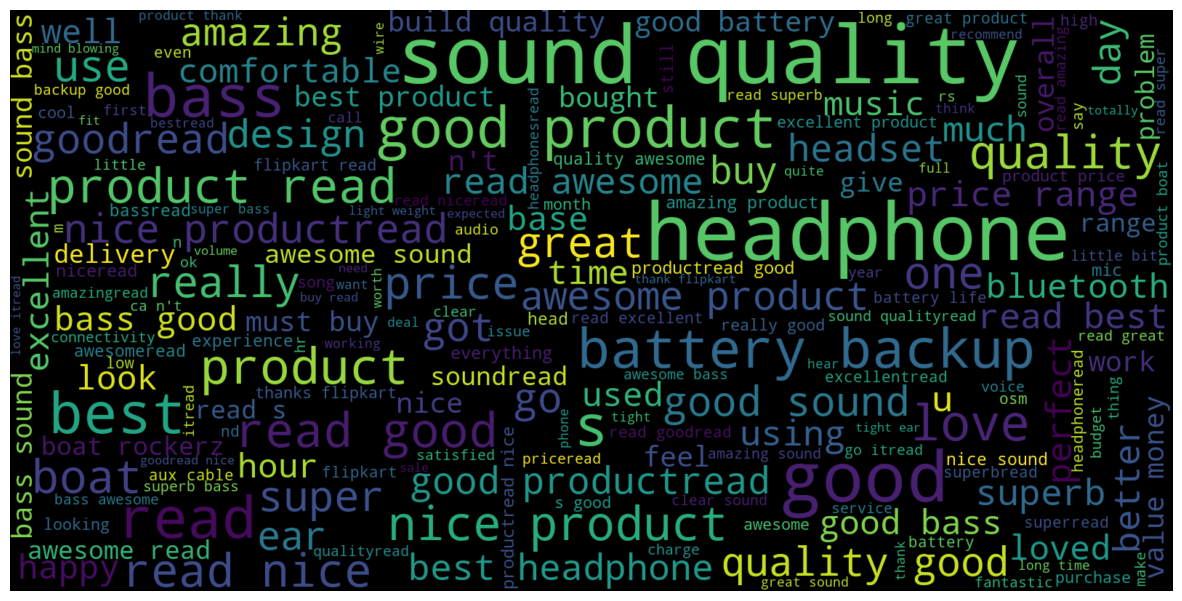

In [34]:
consolidated = ' '.join(word for word in df['review'][df['label']==1].astype(str))
wordCloud = WordCloud(width=1600, height=800, random_state=42, max_font_size=110)

plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

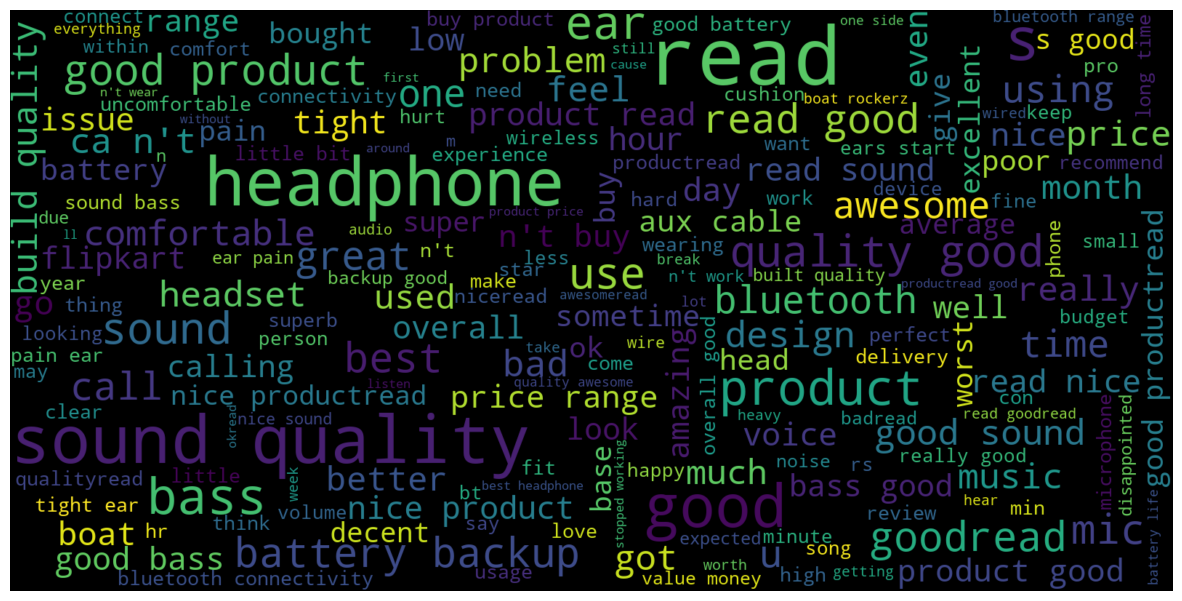

In [36]:
consolidated = ' '.join(word for word in df['review'][df['label']==0].astype(str))
wordCloud = WordCloud(width=1600, height=800, random_state=42, max_font_size=110)

plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [38]:
##converting text into vectors

cv = TfidfVectorizer(max_features=2500)
x = cv.fit_transform(df['review']).toarray()

In [40]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
##model Training Evaluation and prediction

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df['label'], test_size=0.33, stratify = df['label'], random_state = 42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [50]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_train)
print(accuracy_score(y_train, pred))

0.9260811013018105


In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

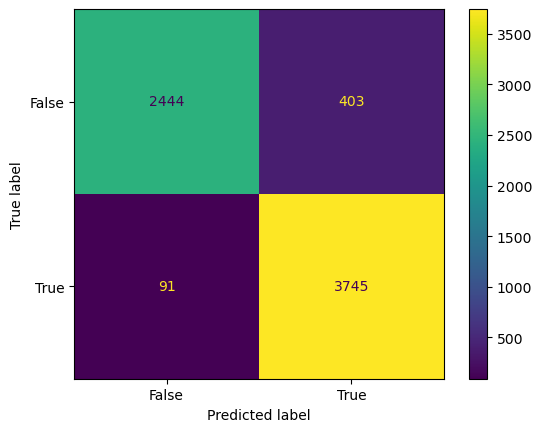

In [58]:
cm = confusion_matrix(y_train,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()